In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

<h3>Load Data</h3>

In [4]:
df = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Employee Retention with solution/employee_retention.csv")
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [8]:
interest_column = ["company_id", "dept", "seniority"]
for col in interest_column:
    uniques = sorted(df[col].unique())
    print("{0:10s} {1:5d}\t".format(col, len(uniques)), uniques[:5])

company_id    12	 [1, 2, 3, 4, 5]
dept           6	 ['customer_service', 'data_science', 'design', 'engineer', 'marketing']
seniority     31	 [1, 2, 3, 4, 5]


In [9]:
df.sort_values("seniority", ascending = False)[:10]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
11717,426218.0,2,customer_service,29,118000.0,2011-03-02,2013-07-12
12013,889253.0,2,engineer,29,318000.0,2011-09-12,NaN
647,664204.0,8,marketing,29,147000.0,2014-02-03,2015-02-20
11980,326579.0,2,engineer,29,296000.0,2012-11-26,2015-03-06
11936,937872.0,3,customer_service,29,113000.0,2015-03-09,NaN
11916,245494.0,2,marketing,29,219000.0,2012-07-30,NaN
11894,992809.0,7,customer_service,29,104000.0,2014-09-15,NaN
11814,21034.0,2,engineer,29,324000.0,2012-12-24,2014-08-22


In [10]:
df.drop([24701, 24700], axis = 0, inplace = True)

In [11]:
df.join_date = pd.to_datetime(df.join_date)
df.quit_date = pd.to_datetime(df.quit_date)

Q1: Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id

In [12]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [13]:
# create a list of unique dates
unique_dates = pd.date_range(start = "2011/01/23", end = "2015/12/13")

In [14]:
# create a list of unique companies
unique_companies = sorted(df["company_id"].unique())

In [15]:
# calculate hc and quit
days = []
companies = []
headcounts = []

for day in unique_dates:
    for company in unique_companies:
        inflow = len(df[(df["company_id"] == company) & (df["join_date"] <= day)])
        outflow = len(df[(df["company_id"] == company) & (df["quit_date"] <= day)])
        days.append(day)
        companies.append(company)
        headcounts.append(inflow-outflow)

In [16]:
hc_df = pd.DataFrame({
    "day":days,
    "companies":companies,
    "headcounts":headcounts
})


In [17]:
hc_df.tail()

,day,companies,headcounts
21427,2015-12-13,8,468
21428,2015-12-13,9,432
21429,2015-12-13,10,385
21430,2015-12-13,11,4
21431,2015-12-13,12,12


Q2: What are the main factors that drive employee churn? Do they make sense? Explain your findings

In [18]:
# label churn
df["quit"] = df["quit_date"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [19]:
# work length
df["work_days"] = df["quit_date"].fillna(pd.to_datetime("2015-12-13")) - df["join_date"]
df["work_days"] = df["work_days"].astype("timedelta64[D]")

In [20]:
# day of week
df["quit_dow"] = df["quit_date"].apply(lambda x: x.strftime('%A') if not pd.isnull(x) else np.NaN)

In [21]:
# salary interval
def salaryfunc(x) :
    if x >= 10000 and x <= 100000:
        return("10000-100000")
    elif x > 100000 and x <= 150000:
        return("100000-150000")
    elif x > 150000 and x <= 200000:
        return("150000-200000")
    elif x > 200000 and x <= 250000:
        return("200000-250000")
    elif x > 250000 and x <= 300000:
        return("250000-300000")
    elif x > 300000 and x <= 350000:
        return("300000-350000")
    elif x > 350000 and x <= 400000:
        return("350000-400000")
    else:
        return("400000-450000")

df["salary_interval"] = df["salary"].apply(salaryfunc)

In [22]:
df_quit = df[df["quit"] == 1]

In [23]:
df_quit

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,work_days,quit_dow,salary_interval
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0,Friday,10000-100000
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0,Friday,150000-200000
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0,Friday,100000-150000
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0,Friday,250000-300000
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1,578.0,Friday,150000-200000
...,...,...,...,...,...,...,...,...,...,...,...
24690,785497.0,1,sales,24,218000.0,2011-02-01,2015-01-23,1,1452.0,Friday,200000-250000
24692,4881.0,1,data_science,28,249000.0,2012-02-27,2013-04-26,1,424.0,Friday,200000-250000
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1,1151.0,Friday,150000-200000
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,1,372.0,Friday,10000-100000


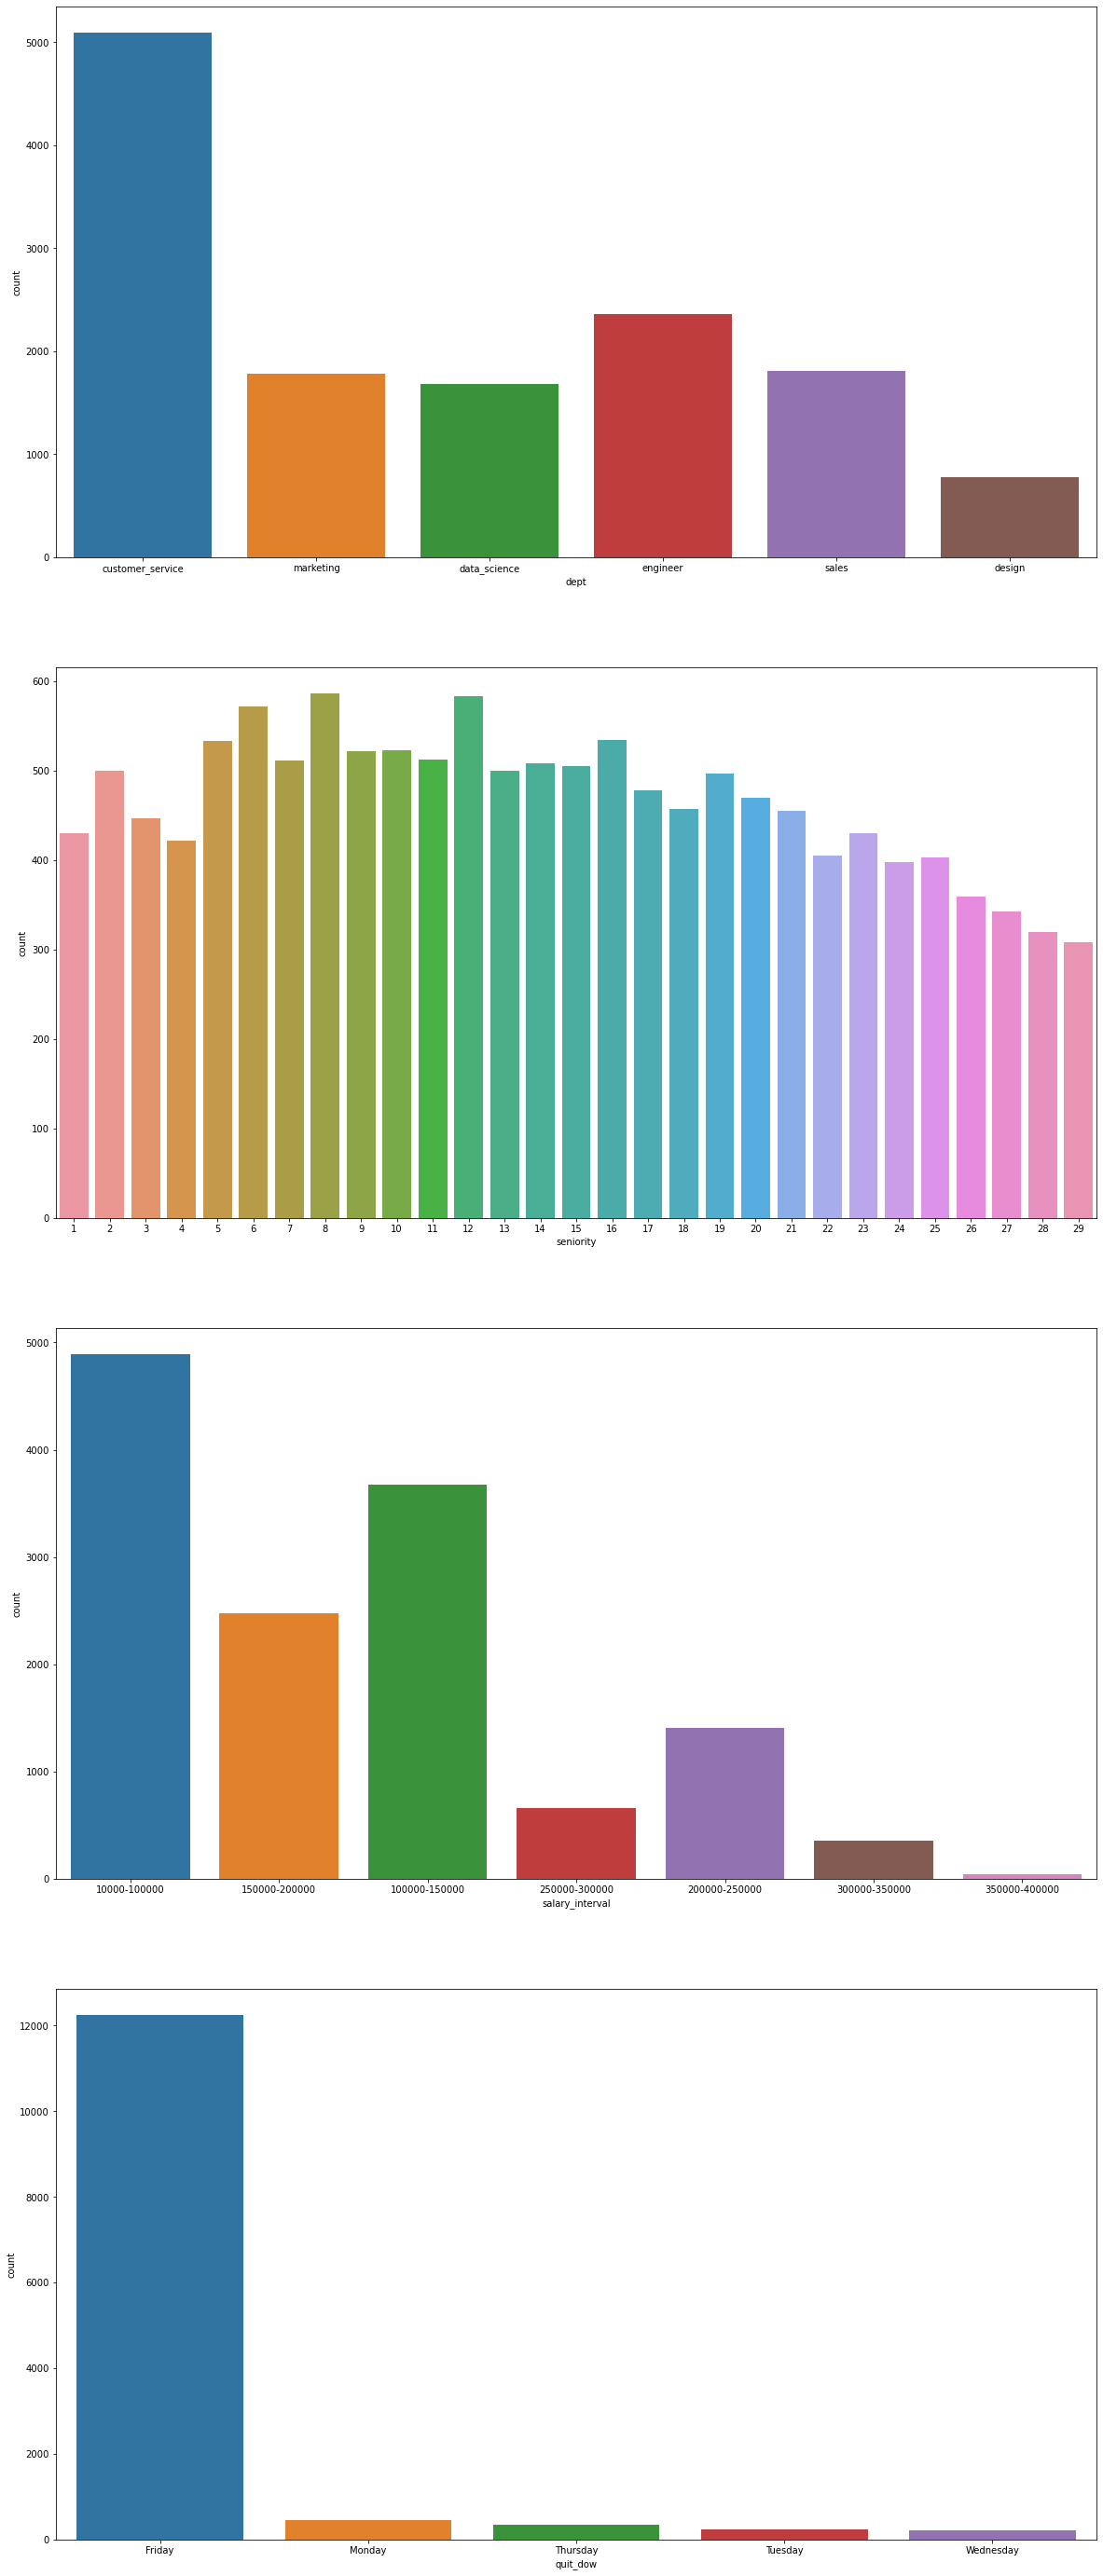

In [24]:
columns = {
    "dept":0, 
    "seniority":1, 
    "salary_interval":2, 
    "quit_dow":3
}

fig, ax = plt.subplots(len(columns), 1, figsize = (20, 50))
for i in columns:
    sns.countplot(x = i, data = df_quit, ax = ax[columns[i]])

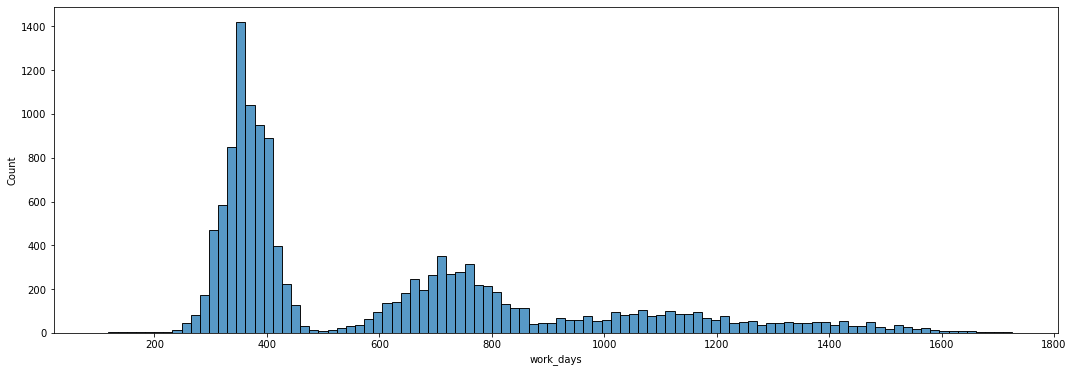

In [25]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.histplot(x = "work_days", data = df_quit, stat = "count", bins = 100)
plt.show()

In [26]:
df_quit = pd.read_csv("df_quit.csv")

In [27]:
df_quit

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,work_days,quit_dow,salary_interval
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0,Friday,10000-100000
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0,Friday,150000-200000
2,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0,Friday,100000-150000
3,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0,Friday,250000-300000
4,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1,578.0,Friday,150000-200000
...,...,...,...,...,...,...,...,...,...,...,...
13503,785497.0,1,sales,24,218000.0,2011-02-01,2015-01-23,1,1452.0,Friday,200000-250000
13504,4881.0,1,data_science,28,249000.0,2012-02-27,2013-04-26,1,424.0,Friday,200000-250000
13505,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1,1151.0,Friday,150000-200000
13506,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,1,372.0,Friday,10000-100000


Decision Tree Model

In [48]:
feature_df = df[["company_id", "dept", "seniority", "salary"]] #we do not include work_days since it is obviously that people who retained has a very long work day. So it is not a feature for prediction but it is a feature calculated based on target classes.
target_df = df["quit"].apply(lambda x: "Quit" if x == 1 else "Not Quit")

In [49]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  24700 non-null  int64  
 1   dept        24700 non-null  object 
 2   seniority   24700 non-null  int64  
 3   salary      24700 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 964.8+ KB


In [50]:
feature_df = feature_df.astype({
    "company_id":"category",
    "dept":"category"
})

In [51]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   company_id  24700 non-null  category
 1   dept        24700 non-null  category
 2   seniority   24700 non-null  int64   
 3   salary      24700 non-null  float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 627.8 KB


In [52]:
feature_df = pd.get_dummies(feature_df)

In [53]:
clf = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 30)

In [54]:
clf.fit(X = feature_df, y = target_df)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30)

In [55]:
feature = list(feature_df.columns)
target = list(target_df.unique())

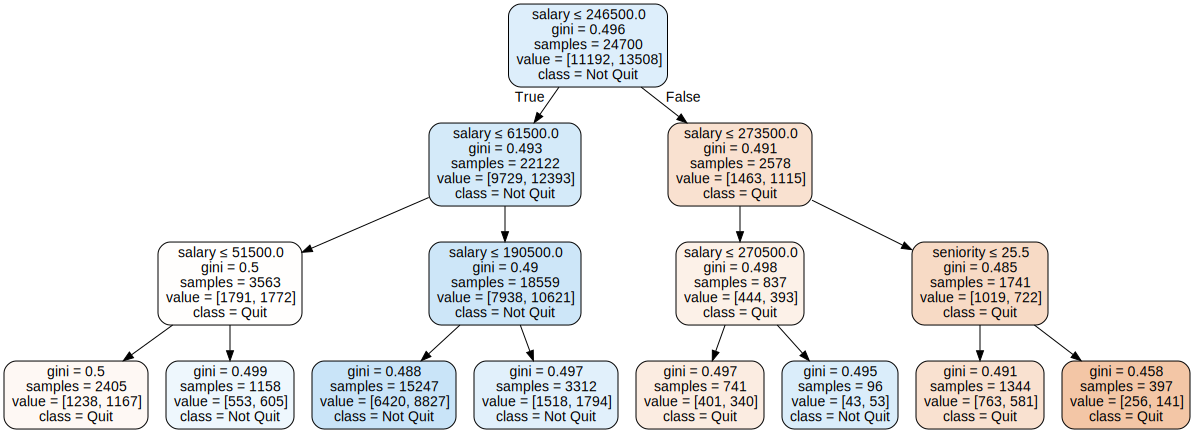

In [56]:
viz = export_graphviz(clf, feature_names= feature, class_names= target, filled= True, rounded= True, special_characters= True)
graphviz.Source(viz)

In [58]:
fi = clf.feature_importances_

In [83]:
for i in range(0, 2):
    print("{0:10s} | {1:5f}".format(feature_df.columns[i], fi[i]))

seniority  | 0.028679
salary     | 0.971321
